# YOLACT++

## Installation

In [1]:
from google.colab import drive
from PIL import Image
import os
import numpy as np

drive.mount('/content/drive')

%cd /content/
!git clone https://github.com/dbash/zerowaste.git

Mounted at /content/drive
/content
Cloning into 'zerowaste'...
remote: Enumerating objects: 1435, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 1435 (delta 8), reused 11 (delta 4), pack-reused 1420
Receiving objects: 100% (1435/1435), 64.56 MiB | 16.94 MiB/s, done.
Resolving deltas: 100% (314/314), done.


In [2]:
# Cython needs to be installed before pycocotools
!pip install cython
!pip install opencv-python pillow pycocotools matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
# Downgrade torch to accommodate DCNv2
!pip install torchvision==0.5.0
!pip install torch==1.4.0


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 51.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 753.4/753.4 MB 2.2 MB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 1.13.1+cu116
    Uninstalling torch-1.13.1+cu116:
      Successfully uninstalled torch-1.13.1+cu116
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.14.1+cu116
    Uninstalling torchvision-0.14.1+cu116:
      Successfully uninstalled torchvision-0.14.1+cu116
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchtext 0.14.1 requires torch==1.13.1, but you have torch 1.4.0 which is incompatible.
torchaudio 0.13.1+cu116 requires torch==1.13.1, but you have torch 1.4.0 which is incompatible.
fastai 2.7.10 requi

### Clone YOLACT from GitHub


In [4]:
# Clone the repo
# !git clone https://github.com/dbolya/yolact.git
!cp -r /content/drive/MyDrive/inzynierka/project/detection/yolact++/yolact /content # repo on git has some mistakes so I copy modified repo from my google drive

### DCNv2
The DCNv2 external library is needed for this to work, so we'll build it now.

**IF YOU GET CUDA ERRORS** You need to change the Runtime of this notebook to "GPU" as mentioned at the top of the notebook.

In [5]:
# Change to the right directory
%cd /content/yolact/external/DCNv2

# Build DCNv2
!python setup.py build develop

/content/yolact/external/DCNv2
running build
running build_ext
running develop
running egg_info
writing DCNv2.egg-info/PKG-INFO
writing dependency_links to DCNv2.egg-info/dependency_links.txt
writing top-level names to DCNv2.egg-info/top_level.txt
adding license file 'LICENSE'
writing manifest file 'DCNv2.egg-info/SOURCES.txt'
running build_ext
copying build/lib.linux-x86_64-3.8/_ext.cpython-38-x86_64-linux-gnu.so -> 
Creating /usr/local/lib/python3.8/dist-packages/DCNv2.egg-link (link to .)
Adding DCNv2 0.1 to easy-install.pth file

Installed /content/yolact/external/DCNv2
Processing dependencies for DCNv2==0.1
Finished processing dependencies for DCNv2==0.1


In [6]:
%cd /content/yolact

/content/yolact


## Training

In [ ]:
!python train.py --config=yolact_plus_zerowaste_config --batch_size=8 --num_workers=0 --save_interval=1500 --validation_epoch=2 --log_folder=/content/drive/MyDrive/studia/inzynierka/Detection/yolact_repo/logs

loading annotations into memory...
Done (t=1.47s)
creating index...
index created!
loading annotations into memory...
Done (t=0.46s)
creating index...
index created!
Initializing weights...
Begin training!

/content/yolact/utils/augmentations.py:309: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  mode = random.choice(self.sample_options)
[  0]       0 || B: 5.945 | C: 18.972 | M: 7.539 | S: 3.600 | I: 1.397 | T: 37.452 || ETA: 43 days, 4:34:34 || timer: 18.658
[  0]      10 || B: 5.096 | C: 10.562 | M: 5.706 | S: 2.359 | I: 0.912 | T: 24.636 || ETA: 18 days, 12:49:26 || timer: 6.336
[  0]      20 || B: 4.738 | C: 8.793 | M: 5.439 | S: 1.632 | I: 0.703 | T: 21.304 || ETA: 17 days, 10:23:41 || timer: 6.242
[  0]      30 || B: 4.587 | C: 7.860 | M: 5.339 | S: 1.308 | I: 0

In [ ]:
# resuming training
!python train.py --config=yolact_plus_zerowaste_aug_config --resume=/content/drive/MyDrive/inzynierka/project/detection/yolact++/yolact/weights/yolact_plus_zerowaste_5_1844_interrupt.pth --start_iter=-1 --batch_size=8 --num_workers=0 --save_interval=1500 --validation_epoch=2 --save_folder=/content/drive/MyDrive/inzynierka/project/detection/yolact++/yolact/weights

loading annotations into memory...
Done (t=0.27s)
creating index...
index created!
loading annotations into memory...
Done (t=0.05s)
creating index...
index created!
Resuming training, loading /content/drive/MyDrive/inzynierka/project/detection/yolact++/yolact/weights/yolact_plus_zerowaste_5_1844_interrupt.pth...
Begin training!

/content/yolact/utils/augmentations.py:309: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  mode = random.choice(self.sample_options)
[  5]    1850 || B: 1.809 | C: 2.596 | M: 2.828 | S: 0.214 | I: 0.304 | T: 7.751 || ETA: 19 days, 10:43:40 || timer: 8.288
[  5]    1860 || B: 1.888 | C: 2.649 | M: 2.828 | S: 0.230 | I: 0.336 | T: 7.931 || ETA: 19 days, 13:09:36 || timer: 7.522
[  5]    1870 || B: 1.932 | C: 2.660 | M: 2.898 | S: 0.223 | I: 0.38

In [ ]:
import matplotlib.pyplot as plt
from utils.functions import MovingAverage
from typing import Union
from collections import defaultdict
import json
from utils.logger import LogVisualizer, LogEntry
from matplotlib.pyplot import figure



def my_add(self, path:str, session:Union[int,list]=None):
    """ Add a log file to the list of logs being considered. """

    log = defaultdict(lambda: [])
    total_log = []

    if not os.path.exists(path):
        print(path + ' doesn\'t exist!')
        return

    session_idx = 0
    ignoring = True
    
    def valid(idx):
        if session is None:
            return True
        elif type(session) == int:
            return (idx == session)
        else:
            return idx in session

    with open(path, 'r') as f:
        for line in f:
            line = line.strip()
            if len(line) > 0:
                js = json.loads(line)
                
                _type = js['type']
                if _type == 'session':
                    session_idx = js['session']
                    
                    ignoring = valid(session_idx)
                
                if not ignoring:
                    
                    ljs = LogEntry(js)
                    if _type == 'session':
                        js['_s'] = ljs
                    else:
                        js['_s'] =log['session'][-1]
                    log[_type].append(ljs)
                    total_log.append(ljs)
    
    name = os.path.basename(path)
    if session is not None:
        name += ' (Session %s)' % session

    self.logs.append(log)
    self.total_logs.append(total_log)
    self.log_names.append(name)

def my_plot(self, entry_type:str, x:str, y:str, smoothness:int=0):
    """ Plot sequential log data. """

    query_x = self._decode(x)
    query_y = self._decode(y)

    for idx, (log, name) in enumerate(zip(self.logs, self.log_names)):
        figure(figsize=(20, 8), dpi=80)
        log = log[entry_type]

        if smoothness > 1:
            avg = MovingAverage(smoothness)

        _x = []
        _y = []

        for datum in log:
            val_x = self._follow(datum, query_x)
            val_y = self._follow(datum, query_y)

            if val_x is not None and val_y is not None:
                if smoothness > 1:
                    avg.append(val_y)
                    val_y = avg.get_avg()

                    if len(avg) < smoothness // 10:
                        continue
                    
                _x.append(val_x)
                _y.append(val_y)

            if val_x is None and val_y is not None:
                if smoothness > 1:
                    avg.append(val_y)
                    val_y = avg.get_avg()

                    if len(avg) < smoothness // 10:
                        continue
                    
                _x.append(val_x)
                _y.append(val_y)
        _x = range(1, len(_y)+1)
        
        plt.plot(_x, _y, color=self._color(idx), label=name)
    
    # plt.title(y.replace('x.', entry_type + '.'))
    plt.title("Total loss during training")
    # plt.legend()
    plt.xlabel("iterations")
    plt.grid(linestyle=':', linewidth=0.5)
    # plt.show()
    plt.savefig("/content/loss.png")

from utils.logger import LogVisualizer
LogVisualizer.plot = my_plot
LogVisualizer.add = my_add

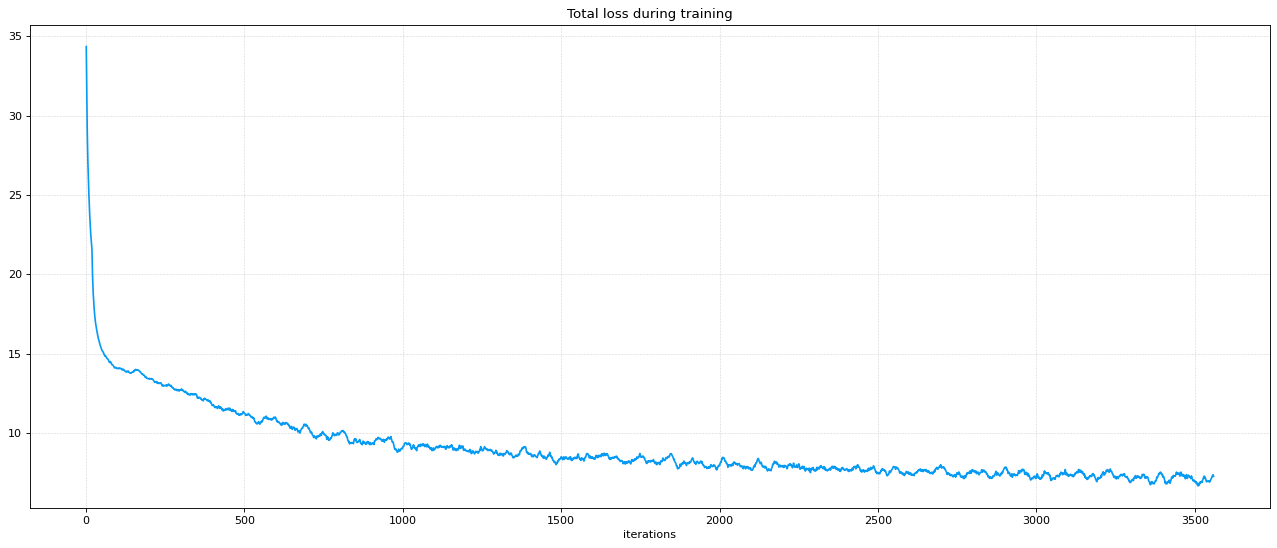

In [ ]:
# from utils.logger import LogVisualizer

vis = LogVisualizer()
# vis.sessions('/content/drive/MyDrive/studia/inzynierka/Detection/yolact_repo/logs/yolact_taco.log')
# vis.add('/content/drive/MyDrive/inzynierka/project/detection/yolact++/yolact/logs/yolact_taco.log', session=1)
# vis.add('/content/drive/MyDrive/inzynierka/project/detection/yolact++/yolact/logs/yolact_plus_zerowaste.log', session=3) # If multiple sessions, use a list of ids
vis.add('/content/drive/MyDrive/inzynierka/project/detection/yolact++/yolact/logs/test_log.log', session=3) # If multiple sessions, use a list of ids

vis.plot('train', 'x.data.iter * s.data.batch_size', 'x.data.loss.T', smoothness=20)

### Evaluation

In [ ]:
# !python eval.py -h

In [ ]:
!python eval.py --config=yolact_plus_zerowaste_config --trained_model=/content/drive/MyDrive/inzynierka/project/detection/yolact++/yolact/weights/yolact_plus_zerowaste_9_3543_interrupt.pth --dataset=zerowaste_test_dataset

loading annotations into memory...
Done (t=1.02s)
creating index...
index created!
Loading model... Done.

Processing Images  ██████████████████████████████    899 /    899 (100.00%)     1.28 fps        
Saving data...
Calculating mAP...

       |  all  |  .50  |  .55  |  .60  |  .65  |  .70  |  .75  |  .80  |  .85  |  .90  |  .95  |
-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+
   box | 17.10 | 31.87 | 30.12 | 27.99 | 25.30 | 21.85 | 17.18 | 11.38 |  4.51 |  0.78 |  0.03 |
  mask | 18.35 | 30.96 | 29.34 | 27.50 | 25.48 | 22.42 | 18.90 | 14.99 |  9.85 |  3.68 |  0.38 |
-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+



#### Running inference on images

In [ ]:
!python eval.py --config=yolact_plus_zerowaste_config --trained_model=/content/drive/MyDrive/inzynierka/project/detection/yolact++/yolact/weights/yolact_plus_zerowaste_9_3543_interrupt.pth --score_threshold=0.5 --top_k=30 --images="/content/drive/MyDrive/inzynierka/datasets/to_do_inference2":"/content/drive/MyDrive/inzynierka/project/detection/yolact++/results/inference_results" 

Loading model... Done.

/content/drive/MyDrive/inzynierka/datasets/to_do_inference2/08_frame_001400.PNG -> /content/drive/MyDrive/inzynierka/project/detection/yolact++/results/inference_results/08_frame_001400.png
/content/drive/MyDrive/inzynierka/datasets/to_do_inference2/08_frame_001200.PNG -> /content/drive/MyDrive/inzynierka/project/detection/yolact++/results/inference_results/08_frame_001200.png
/content/drive/MyDrive/inzynierka/datasets/to_do_inference2/03_frame_024100.PNG -> /content/drive/MyDrive/inzynierka/project/detection/yolact++/results/inference_results/03_frame_024100.png
Done.


In [ ]:
# !python eval.py --config=yolact_plus_zerowaste_config --trained_model=/content/drive/MyDrive/inzynierka/project/detection/yolact++/yolact/weights/yolact_plus_zerowaste_9_3543_interrupt.pth --dataset=zerowaste_test_dataset --score_threshold=0.05 --display

### Continue training with ZeroWasteAug

In [ ]:
!python train.py --config=yolact_plus_zerowaste_aug_config --resume=/content/drive/MyDrive/inzynierka/project/detection/yolact++/yolact/weights/yolact_plus_zerowaste_9_3543_interrupt.pth --start_iter=-1 --batch_size=8 --num_workers=0 --save_interval=1500 --validation_epoch=2 --save_folder=/content/drive/MyDrive/inzynierka/project/detection/yolact++/yolact/weights/aug --log_folder=/content/drive/MyDrive/inzynierka/project/detection/yolact++/yolact/logs/aug

loading annotations into memory...
Done (t=6.36s)
creating index...
index created!
loading annotations into memory...
Done (t=1.71s)
creating index...
index created!
Resuming training, loading /content/drive/MyDrive/inzynierka/project/detection/yolact++/yolact/weights/yolact_plus_zerowaste_9_3543_interrupt.pth...
Begin training!

/content/yolact/utils/augmentations.py:309: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  mode = random.choice(self.sample_options)
[  9]    3550 || B: 1.864 | C: 3.327 | M: 2.998 | S: 0.345 | I: 0.409 | T: 8.944 || ETA: 40 days, 17:20:03 || timer: 18.745
[  9]    3560 || B: 1.846 | C: 3.233 | M: 2.921 | S: 0.366 | I: 0.355 | T: 8.721 || ETA: 41 days, 4:35:05 || timer: 18.945
[  9]    3570 || B: 1.798 | C: 3.112 | M: 2.860 | S: 0.364 | I: 0.3

In [ ]:
!python train.py --config=yolact_plus_zerowaste_aug_config --resume=/content/drive/MyDrive/inzynierka/project/detection/yolact++/yolact/weights/aug/yolact_plus_zerowaste_10_3975_interrupt.pth --start_iter=-1 --batch_size=8 --num_workers=0 --save_interval=1000 --validation_epoch=2 --save_folder=/content/drive/MyDrive/inzynierka/project/detection/yolact++/yolact/weights/aug --log_folder=/content/drive/MyDrive/inzynierka/project/detection/yolact++/yolact/logs/aug

loading annotations into memory...
Done (t=2.58s)
creating index...
index created!
loading annotations into memory...
Done (t=0.08s)
creating index...
index created!
Resuming training, loading /content/drive/MyDrive/inzynierka/project/detection/yolact++/yolact/weights/aug/yolact_plus_zerowaste_10_3975_interrupt.pth...
Begin training!

/content/yolact/utils/augmentations.py:309: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  mode = random.choice(self.sample_options)
[ 10]    3980 || B: 1.588 | C: 2.548 | M: 2.635 | S: 0.255 | I: 0.255 | T: 7.281 || ETA: 15 days, 16:57:27 || timer: 10.053
[ 10]    3990 || B: 1.686 | C: 2.590 | M: 2.660 | S: 0.253 | I: 0.251 | T: 7.440 || ETA: 15 days, 13:56:01 || timer: 8.183
Saving state, iter: 4000
[ 10]    4000 || B: 1.710 | C: 2.597 

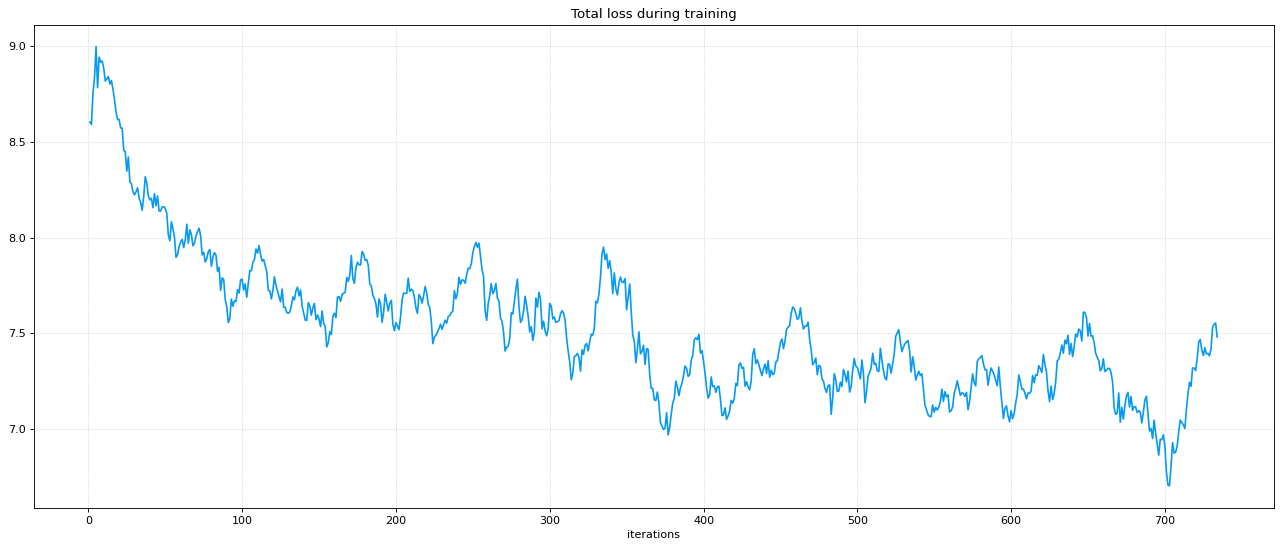

In [ ]:
vis = LogVisualizer()
vis.add('/content/drive/MyDrive/inzynierka/project/detection/yolact++/yolact/logs/aug/log_aug.log', session=5) # If multiple sessions, use a list of ids

vis.plot('train', 'x.data.iter * s.data.batch_size', 'x.data.loss.T', smoothness=20)

### Evaluation of the new model

In [ ]:
!python eval.py --config=yolact_plus_zerowaste_config --trained_model=/content/drive/MyDrive/inzynierka/project/detection/yolact++/yolact/weights/aug/yolact_plus_zerowaste_11_4278_interrupt.pth --dataset=zerowaste_test_dataset

loading annotations into memory...
Done (t=0.72s)
creating index...
index created!
Loading model... Done.

Processing Images  ██████████████████████████████    899 /    899 (100.00%)     0.66 fps        
Saving data...
Calculating mAP...

       |  all  |  .50  |  .55  |  .60  |  .65  |  .70  |  .75  |  .80  |  .85  |  .90  |  .95  |
-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+
   box | 17.77 | 32.90 | 31.24 | 28.91 | 25.87 | 21.78 | 17.60 | 12.40 |  5.60 |  1.33 |  0.04 |
  mask | 19.58 | 32.79 | 31.29 | 29.09 | 26.75 | 23.87 | 20.36 | 16.32 | 10.48 |  4.36 |  0.46 |
-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+



### Benchmarking - measuring fps of inference

In [ ]:
!python eval.py --config=yolact_plus_zerowaste_config --trained_model=/content/drive/MyDrive/inzynierka/project/detection/yolact++/yolact/weights/aug/yolact_plus_zerowaste_11_4278_interrupt.pth --dataset=zerowaste_test_dataset --benchmark

loading annotations into memory...
Done (t=2.43s)
creating index...
index created!
Loading model... Done.

Processing Images  ░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░      2 /    899 ( 0.22%)     0.00 fps        Stopping...


## Doing inference on images

In [ ]:
!python eval.py --config=yolact_plus_zerowaste_config --trained_model=/content/drive/MyDrive/inzynierka/project/detection/yolact++/yolact/weights/aug/yolact_plus_zerowaste_11_4278_interrupt.pth --score_threshold=0.5 --top_k=30 --images="/content/drive/MyDrive/inzynierka/datasets/to_do_inference2":"/content/results/inference_aug_results" 

^C


## Evaluation per category

### Only ZeroWaste trained

In [7]:
!python eval.py --config=yolact_plus_zerowaste_config --trained_model=/content/drive/MyDrive/inzynierka/project/detection/yolact++/yolact/weights/yolact_plus_zerowaste_9_3543_interrupt.pth --dataset=zerowaste_test_dataset --output_coco_json

loading annotations into memory...
Done (t=2.11s)
creating index...
index created!
Loading model... Done.

Processing Images  ██████████████████████████████    899 /    899 (100.00%)     0.53 fps        
Dumping detections...


### ZeroWaste and ZeroWasteAug trained

In [ ]:
!python eval.py --config=yolact_plus_zerowaste_config --trained_model=/content/drive/MyDrive/inzynierka/project/detection/yolact++/yolact/weights/aug/yolact_plus_zerowaste_11_4278_interrupt.pth --dataset=zerowaste_test_dataset --output_coco_json

loading annotations into memory...
Done (t=0.06s)
creating index...
index created!
Loading model... Done.

Processing Images  ██████████████████████████████    899 /    899 (100.00%)     0.97 fps        
Dumping detections...


In [9]:
%%writefile run_coco_eval.py
"""
Runs the coco-supplied cocoeval script to evaluate detections
outputted by using the output_coco_json flag in eval.py.
"""


import argparse

from pycocotools.coco import COCO
from pycocotools.cocoeval import COCOeval


parser = argparse.ArgumentParser(description='COCO Detections Evaluator')
parser.add_argument('--bbox_det_file', default='results/bbox_detections.json', type=str)
parser.add_argument('--mask_det_file', default='results/mask_detections.json', type=str)
parser.add_argument('--gt_ann_file',   default='data/coco/annotations/instances_val2017.json', type=str)
parser.add_argument('--eval_type',     default='both', choices=['bbox', 'mask', 'both'], type=str)
args = parser.parse_args()



if __name__ == '__main__':

    eval_bbox = (args.eval_type in ('bbox', 'both'))
    eval_mask = (args.eval_type in ('mask', 'both'))

    print('Loading annotations...')
    gt_annotations = COCO(args.gt_ann_file)
    if eval_bbox:
        bbox_dets = gt_annotations.loadRes(args.bbox_det_file)
    if eval_mask:
        mask_dets = gt_annotations.loadRes(args.mask_det_file)


    print("ALL")
    if eval_bbox:
        print('\nEvaluating BBoxes:')
        bbox_eval = COCOeval(gt_annotations, bbox_dets, 'bbox')
        bbox_eval.evaluate()
        bbox_eval.accumulate()
        bbox_eval.summarize()
        print(sorted(bbox_dets.getCatIds()))

        
	
    if eval_mask:
        print('\nEvaluating Masks:')
        bbox_eval = COCOeval(gt_annotations, mask_dets, 'segm')
        bbox_eval.evaluate()
        bbox_eval.accumulate()
        bbox_eval.summarize()

    print('============================================')

    print("rigid_plastic")
    if eval_bbox:
        print('\nEvaluating BBoxes:')
        bbox_eval = COCOeval(gt_annotations, bbox_dets, 'bbox')
        bbox_eval.params.catIds = [1] # person id : 1
        bbox_eval.evaluate()
        bbox_eval.accumulate()
        bbox_eval.summarize()
        print(sorted(bbox_dets.getCatIds()))

        
	
    if eval_mask:
        print('\nEvaluating Masks:')
        bbox_eval = COCOeval(gt_annotations, mask_dets, 'segm')
        bbox_eval.params.catIds = [1] # person id : 1
        bbox_eval.evaluate()
        bbox_eval.accumulate()
        bbox_eval.summarize()
    print('============================================')

    print("cardboard")
    if eval_bbox:
        print('\nEvaluating BBoxes:')
        bbox_eval = COCOeval(gt_annotations, bbox_dets, 'bbox')
        bbox_eval.params.catIds = [2] # person id : 1
        bbox_eval.evaluate()
        bbox_eval.accumulate()
        bbox_eval.summarize()
        print(sorted(bbox_dets.getCatIds()))

        
	
    if eval_mask:
        print('\nEvaluating Masks:')
        bbox_eval = COCOeval(gt_annotations, mask_dets, 'segm')
        bbox_eval.params.catIds = [2] # person id : 1
        bbox_eval.evaluate()
        bbox_eval.accumulate()
        bbox_eval.summarize()
    print('============================================')

    print("metal")
    if eval_bbox:
        print('\nEvaluating BBoxes:')
        bbox_eval = COCOeval(gt_annotations, bbox_dets, 'bbox')
        bbox_eval.params.catIds = [3] # person id : 1
        bbox_eval.evaluate()
        bbox_eval.accumulate()
        bbox_eval.summarize()
        print(sorted(bbox_dets.getCatIds()))

        
	
    if eval_mask:
        print('\nEvaluating Masks:')
        bbox_eval = COCOeval(gt_annotations, mask_dets, 'segm')
        bbox_eval.params.catIds = [3] # person id : 1
        bbox_eval.evaluate()
        bbox_eval.accumulate()
        bbox_eval.summarize()
    print('============================================')

    print("soft_plastic")
    if eval_bbox:
        print('\nEvaluating BBoxes:')
        bbox_eval = COCOeval(gt_annotations, bbox_dets, 'bbox')
        bbox_eval.params.catIds = [4] # person id : 1
        bbox_eval.evaluate()
        bbox_eval.accumulate()
        bbox_eval.summarize()
        print(sorted(bbox_dets.getCatIds()))

        
	
    if eval_mask:
        print('\nEvaluating Masks:')
        bbox_eval = COCOeval(gt_annotations, mask_dets, 'segm')
        bbox_eval.params.catIds = [4] # person id : 1
        bbox_eval.evaluate()
        bbox_eval.accumulate()
        bbox_eval.summarize()

Overwriting run_coco_eval.py


In [10]:
!python run_coco_eval.py --bbox_det_file=/content/yolact/results/bbox_detections.json --mask_det_file=/content/yolact/results/mask_detections.json --gt_ann_file=/content/drive/MyDrive/inzynierka/datasets/zerowaste-f-final/splits_final_deblurred/test/labels.json 

Loading annotations...
loading annotations into memory...
Done (t=0.06s)
creating index...
index created!
Loading and preparing results...
DONE (t=0.42s)
creating index...
index created!
Loading and preparing results...
DONE (t=1.38s)
creating index...
index created!
ALL

Evaluating BBoxes:
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=2.74s).
Accumulating evaluation results...
DONE (t=0.79s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.170
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.318
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.171
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.121
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.182
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.209
 Average Recall  

In [12]:
!cp -r /content/yolact/results /content/drive/MyDrive/inzynierka/project/detection/yolact++/yolact